# PRIYANSH SANGULE CS16B021

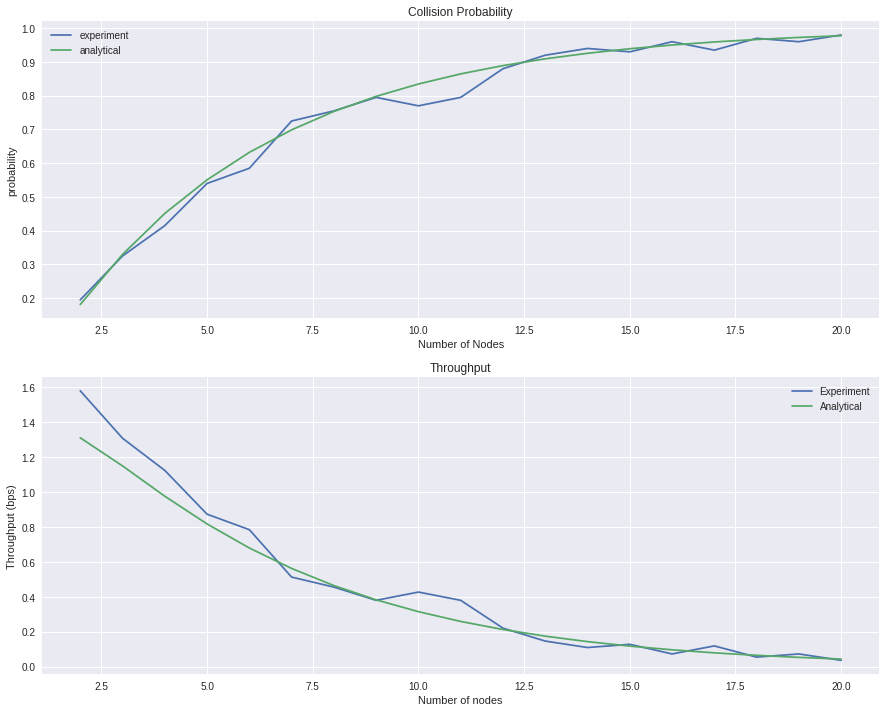

In [24]:
from random import expovariate, seed
import matplotlib.pyplot as plt

beta=0.2 #Exponential Random Variable Constant
delta=1 #Collision range
cycles=200 #Iterations 
tsuccess = 10 #Success time
tcollision = 10 #Collision
packetsize = 20 
n = 20
e = 2.718

#Updating node time to a new time
def newTime(time):
  return time + expovariate(beta)

#Get next immediate node i.e which has min time of all nodes
def getMinNode(nodes):
  min_node,min_index = nodes[0], 0
  for node_num,node in enumerate(nodes):
    if node < min_node:
      min_node = node
      min_index = node_num
  return min_node, min_index

#Get Collisions
def getCollisions(nodes, time):
  collided = []
  for i,node in enumerate(nodes):
    if time <= node <= time+delta:
      collided.append(i)
  return collided

#SimulateCSMA/CA
def SimulateCSMACA(node_count):
  time = 0
  totaltime = 0
  success = 0
  collision = 0
  nodes = [newTime(time) for i in range(node_count)]
  for i in range(cycles):
    newnode, newnode_index = getMinNode(nodes)
    time = newnode
    coll = getCollisions(nodes, time)
    if len(coll) == 1: #if only one exists in that range - success
      #print (" Node num " , newnode_index , " complete")
      success += 1
      totaltime += tsuccess 
      time = newnode
      nodes[coll[0]]=newTime(time)
    else:
      collision+=1
      totaltime += delta + tcollision
      time += delta
      for j in coll:
        nodes[j] = newTime(time)
  return float(collision)/(success+collision), success*packetsize/totaltime

#Collision probability
def analyticCollision(nodes):
    l = []
    for i in nodes:
        l.append(1 - e**((1-i)*beta*delta))
    return l

#Throughput from simulation
def Throughput(n,p):
    a = (1-p)*packetsize
    b = 1/(n*beta) + p*tcollision + (1-p)*tsuccess
    return a/b

#AnalyticThroughput using formula
def analyticThroughput(nodes):
    asu = analyticCollision(nodes)
    l = []
    for i in range(len(nodes)):
        l.append(Throughput(nodes[i],asu[i]))
    return l

collisionProb, throughput = [], []
nodez = range(2,n+1)
for i in nodez:
    temp = SimulateCSMACA(i)
    collisionProb.append(temp[0])
    throughput.append(temp[1])
    
fig, ax = plt.subplots(nrows = 2, ncols = 1, figsize = (15,12))
ax[0].set_title("Collision Probability")
ax[0].set_xlabel("Number of Nodes")
ax[0].set_ylabel("probability")
ax[0].plot(nod,collisionProb,label="experiment")
ax[0].plot(nod,analyticCollision(nod),label="analytical")
ax[0].legend()
ax[1].set_title("Throughput")
ax[1].set_xlabel("Number of nodes")
ax[1].set_ylabel("Throughput (bps)")
ax[1].plot(nod,throughput,label="Experiment")
ax[1].plot(nod,analyticThroughput(nod),label="Analytical")
ax[1].legend()
fig.show()
